# Requesting data from essios

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read environment variables from .env file
with open('../.env', 'rt') as fp:
    TOKEN = fp.read().strip().split("\n")[0].split("=")[1]

In [14]:
PERSONAL_TOKEN = TOKEN or "YOUR_TOKEN"
BASE_URL = "https://api.esios.ree.es"

## Request archives

As per https://api.esios.ree.es/archive/getting_a_list_of_archives

In [18]:
headers = {
    "Accept": "application/json; application/vnd.esios-api-v1+json",
    "Content-Type": "application/json",
    "Host": "api.esios.ree.es",
    "Authorization": "Token token={}".format(PERSONAL_TOKEN),
    "Cookie": "",
}

ARCHIVE_URL = BASE_URL + "/archives"

In [19]:
# make the request
r = requests.get(ARCHIVE_URL, headers=headers)

In [20]:
r.json()

{'archives': [{'name': 'CodigosAutoconsumo',
   'id': 166,
   'horizon': 'NA',
   'archive_type': 'pdf',
   'download': {'name': 'CodigosAutoconsumo',
    'url': '/archives/166/download?date=2022-01-13T23%3A59%3A59%2B01%3A00&locale=es'},
   'date': {'date': '2022-01-13T23:59:59.000+01:00'},
   'date_times': ['2022-01-13'],
   'publication_date': ['2022-01-13'],
   'taxonomy_terms': [{'id_taxonomy_term': 155,
     'name': 'Generación y consumo',
     'vocabulary_id': 20},
    {'id_taxonomy_term': 165, 'name': 'Descargas', 'vocabulary_id': 21},
    {'id_taxonomy_term': 173, 'name': 'Medidas', 'vocabulary_id': 22}],
   'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'},
    {'id_vocabulary': 21, 'name': 'Temática'},
    {'id_vocabulary': 22, 'name': 'Área'}]},
  {'name': 'UnidadesConsumoGeneracion',
   'id': 165,
   'horizon': 'NA',
   'archive_type': 'pdf',
   'download': {'name': 'UnidadesConsumoGeneracion',
    'url': '/archives/165/download?date=2022-01-13T23%3A59%3A59%2B01%3A

## Getting data from specific visualization

We want to retrieve the data shown in the visualization in <https://www.esios.ree.es/es/analisis/1293?vis=1&start_date=02-09-2018T00%3A00&end_date=06-10-2018T23%3A50&compare_start_date=01-09-2018T00%3A00&groupby=minutes10&level=1&zoom=6&latlng=40.91351257612758,-1.8896484375>

We suspect the data we need to fetch is an indicator, as described in <https://api.esios.ree.es/indicator/getting_a_disaggregated_indicator_filtering_values_by_a_date_range_and_geo_ids,_grouped_by_geo_id_and_month,_using_avg_aggregation_for_geo_and_avg_for_time_without_time_trunc>

```
locale 	Get translations for sources (es, en). Default language: es
datetime 	A certain date to filter values by (iso8601 format)
start_date 	Beginning of the date range to filter indicator values (iso8601 format)
end_date 	End of the date range to filter indicator values (iso8601 format)
time_agg 	How to aggregate indicator values when grouping them by time. Accepted values: `sum`, `average`. Default value: `sum`.
time_trunc 	Tells the API how to trunc data time series. Accepted values: `ten_minutes`, `fifteen_minutes`, `hour`, `day`, `month`, `year`.
geo_agg 	How to aggregate indicator values when grouping them by geo_id. Accepted values: `sum`, `average`. Default value: `sum`.
geo_ids 	Tells the API the geo ids to filter the dataear && ./bin/rspec by.
geo_trunc 	Tells the API how to group data at geolocalization level when the geo_agg is informed. Accepted values: 'country', 'electric_system', 'autonomous_community', 'province', 'electric_subsystem', 'town' and 'drainage_basin'
```

In [21]:
# format datetimes as ISO8601
# https://stackoverflow.com/questions/2150739/iso-time-iso-8601-in-python

# specify time zones as if it were in Spain or in UTC?
# https://www.enricozini.org/blog/2009/debian/using-python-datetime/

import datetime as dt
from time import strftime
import pytz

dt.datetime.utcnow().isoformat()

'2022-01-13T09:31:04.588513'

In [22]:
pytz.country_timezones['ES']

['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary']

In [23]:
REQUEST_ID = "1293"

# tzinfo = pytz.timezone('Europe/Madrid')
tzinfo = None

params = {
    "locale": 	"es",
    # "datetime": A certain date to filter values by (iso8601 format)
    "start_date": dt.datetime(year=2018, month=9, day=2, hour=0, minute=0, second=0, tzinfo=tzinfo).isoformat(), #Beginning of the date range to filter indicator values (iso8601 format)
    "end_date": dt.datetime(year=2018, month=10, day=6, hour=23, minute=0, second=0, tzinfo=tzinfo).isoformat(), # End of the date range to filter indicator values (iso8601 format)
    "time_agg": "sum", # How to aggregate indicator values when grouping them by time. Accepted values: `sum`, `average`. Default value: `sum`.
    "time_trunc": "ten_minutes", # Tells the API how to trunc data time series. Accepted values: `ten_minutes`, `fifteen_minutes`, `hour`, `day`, `month`, `year`.
    # "geo_agg": None, # How to aggregate indicator values when grouping them by geo_id. Accepted values: `sum`, `average`. Default value: `sum`.
    # "geo_ids": None, # Tells the API the geo ids to filter the dataear && ./bin/rspec by.
    # "geo_trunc": None, # Tells the API how to group data at geolocalization level when the geo_agg is informed. Accepted values: 'country', 'electric_system', 'autonomous_community', 'province', 'electric_subsystem', 'town' and 'drainage_basin'
}

In [24]:
INDICATOR_URL = BASE_URL + f"/indicators/{REQUEST_ID}"

In [25]:
r2 = requests.get(INDICATOR_URL, headers=headers, params=params)

In [26]:
r2.json()

{'indicator': {'name': 'Demanda real',
  'short_name': 'Demanda real',
  'id': 1293,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Potencia', 'id': 20}],
  'tiempo': [{'name': 'Diez minutos', 'id': 154}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2018-10-06T23:09:00.000+02:00',
  'values': [{'value': 26572.0,
    'datetime': '2018-09-02T00:00:00.000+02:00',
    'datetime_utc': '2018-09-01T22:00:00Z',
    'tz_time': '2018-09-01T22:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 26673.0,
    'datetime': '2018-09-02T00:10:00.000+02:00',
    'datetime_utc': '2018-09-01T22:10:00Z',
    'tz_time': '2018-09-01T22:10:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 26469.0,
    'datetime': '2018-09-02T00:20:00.000+02:00',
    'datetime_utc': '2018-09-01T22:20:00Z',
    'tz_time': '2018-09-01T22:20:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'

In [27]:
r2.url

'https://api.esios.ree.es/indicators/1293?locale=es&start_date=2018-09-02T00%3A00%3A00&end_date=2018-10-06T23%3A00%3A00&time_agg=sum&time_trunc=ten_minutes'

# Write JSON to file

In [28]:
import json

with open('../resources/dump.json', 'wt') as fp:
    json.dump(r2.json(), fp)

## Move data to dataframe

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [30]:
with open('../resources/dump.json', 'rt') as fp:
    r2_json = json.load(fp)

In [50]:
r2_values = r2_json.get('indicator', {}).get('values', {})
df = pd.DataFrame(r2_values)
df.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
0,26572.0,2018-09-02T00:00:00.000+02:00,2018-09-01T22:00:00Z,2018-09-01T22:00:00.000Z,8741,Península
1,26673.0,2018-09-02T00:10:00.000+02:00,2018-09-01T22:10:00Z,2018-09-01T22:10:00.000Z,8741,Península
2,26469.0,2018-09-02T00:20:00.000+02:00,2018-09-01T22:20:00Z,2018-09-01T22:20:00.000Z,8741,Península
3,26210.0,2018-09-02T00:30:00.000+02:00,2018-09-01T22:30:00Z,2018-09-01T22:30:00.000Z,8741,Península
4,25972.0,2018-09-02T00:40:00.000+02:00,2018-09-01T22:40:00Z,2018-09-01T22:40:00.000Z,8741,Península


In [51]:
df.index = pd.to_datetime(df['datetime'])

In [52]:
df.head()

,value,datetime,datetime_utc,tz_time,geo_id,geo_name
datetime,,,,,,
2018-09-02 00:00:00+02:00,26572.0,2018-09-02T00:00:00.000+02:00,2018-09-01T22:00:00Z,2018-09-01T22:00:00.000Z,8741,Península
2018-09-02 00:10:00+02:00,26673.0,2018-09-02T00:10:00.000+02:00,2018-09-01T22:10:00Z,2018-09-01T22:10:00.000Z,8741,Península
2018-09-02 00:20:00+02:00,26469.0,2018-09-02T00:20:00.000+02:00,2018-09-01T22:20:00Z,2018-09-01T22:20:00.000Z,8741,Península
2018-09-02 00:30:00+02:00,26210.0,2018-09-02T00:30:00.000+02:00,2018-09-01T22:30:00Z,2018-09-01T22:30:00.000Z,8741,Península
2018-09-02 00:40:00+02:00,25972.0,2018-09-02T00:40:00.000+02:00,2018-09-01T22:40:00Z,2018-09-01T22:40:00.000Z,8741,Península


In [57]:
df[['value']]

,value
datetime,
2018-09-02 00:00:00+02:00,26572.0
2018-09-02 00:10:00+02:00,26673.0
2018-09-02 00:20:00+02:00,26469.0
2018-09-02 00:30:00+02:00,26210.0
2018-09-02 00:40:00+02:00,25972.0
...,...
2018-10-06 22:20:00+02:00,26860.0
2018-10-06 22:30:00+02:00,26361.0
2018-10-06 22:40:00+02:00,26214.0


## Write CSV to file

In [53]:
df.to_csv('../resources/data.csv', index=False)

In [12]:
df = pd.read_csv('../resources/data.csv')
df.index = pd.to_datetime(df['datetime'])

## Plot data 

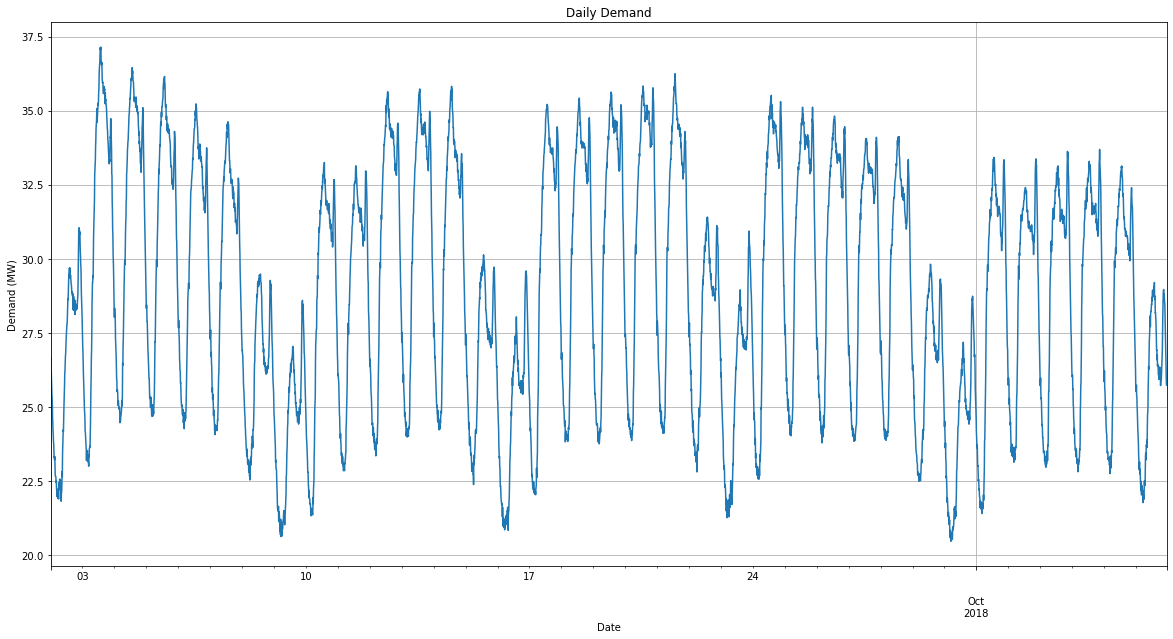

In [13]:
# plot data
fig, ax = plt.subplots(figsize=(20, 10))
df["value"].plot(ax=ax)

# format axis
ax.set(xlabel="Date", ylabel="Demand (MW)", title="Daily Demand")

# format x axis
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# format y axis to show MW
# https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
ax.yaxis.set_major_formatter(lambda x, pos: str(x / 1000.0))

ax.grid()


# Fourier transform

Code I had was done using pytorch

- using a real valued fast fourier transform from tensorflow
- https://www.tensorflow.org/api_docs/python/tf/signal/rfft?hl=en

```python
# fft = tf.signal.rfft(df['mean_sale_eur'])
var_of_interest = "sum_sale_eur"
fft = torch.fft.rfft(torch.Tensor(df[var_of_interest]))
freqs_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[var_of_interest])
hours_per_year = 24 * 365.2524
years_per_dataset = n_samples_h / (hours_per_year)

f_per_year = freqs_per_dataset / years_per_dataset

fig, ax = plt.subplots(figsize=(20, 10))


# ax.bar(f_per_year, np.abs(fft), align="center")
ax.step(f_per_year, np.abs(fft), where='pre')
ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_ylim(0, 10000)
# ax.set_xlim([0.1, max(plt.xlim())])
# ax.set_xticks([1, 31, 45, 180, 365.2524])
labels = [1, 31, 45, 180, 365.2524]
ax.vlines(labels, *ax.get_ylim(), "g", label=labels)
for label in labels:
    ax.text(
        x=label*1.05,
        y=ax.get_ylim()[1]*0.5,
        s=f"{label} days",
        size=20,
        rotation=90
    )
# ax.set_xticklabels(
#     labels=["1 day", "month", "45 days", "season", "year"], rotation=90, size=20
# )

ax.set_xticklabels(labels=ax.get_xticks(), rotation=90, size=20)

ax.set_xlabel("Frequency (log scale)", size=20)
ax.set_yticklabels(ax.get_yticks(), size=20)
# fig.savefig("fft_sales.pdf", bbox_inches="tight");

```

In [14]:
from scipy import fft
import numpy as np
# https://stackoverflow.com/questions/6363154/what-is-the-difference-between-numpy-fft-and-scipy-fftpack
# As per the documentation, fftpack submodule is now considered legacy, new code should use :mod:`scipy.fft`.

In [15]:
df[['value']].shape

(5035, 1)

In [16]:
# I need to confirm this!!

# compute the 1D fast fourier transform
fft_values = fft.fft(df["value"].values)

In [17]:
pd.to_datetime(df.datetime).describe(datetime_is_numeric=True)

count                         5035
mean     2018-09-19 11:30:00+02:00
min      2018-09-02 00:00:00+02:00
25%      2018-09-10 17:45:00+02:00
50%      2018-09-19 11:30:00+02:00
75%      2018-09-28 05:15:00+02:00
max      2018-10-06 23:00:00+02:00
Name: datetime, dtype: object

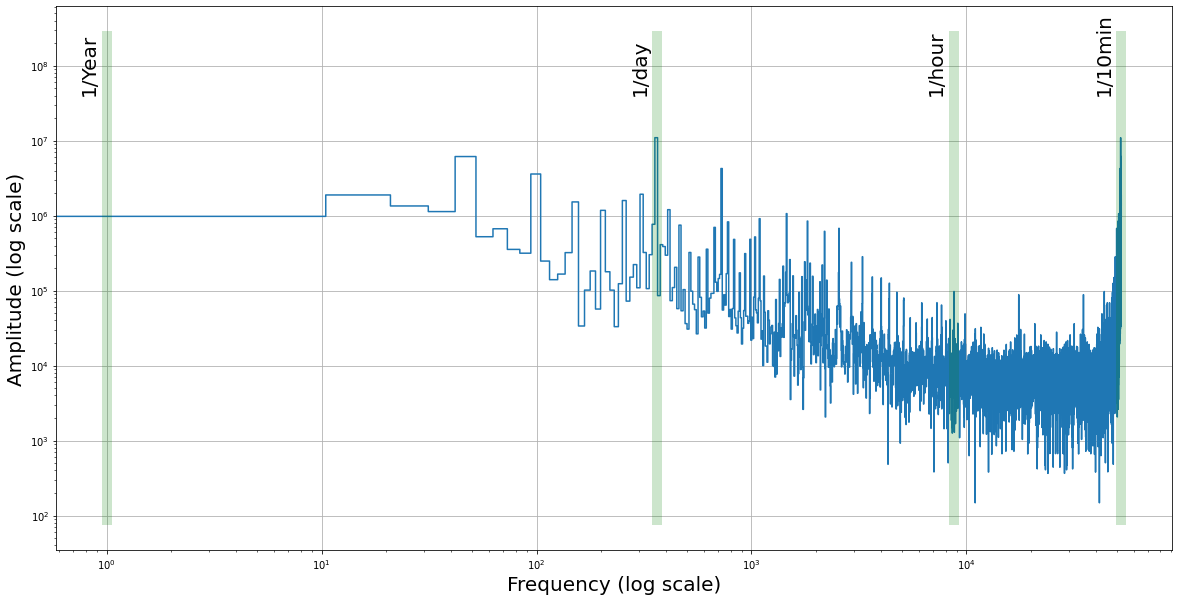

In [31]:

# compute human-readable frequencies
freqs_in_fft = np.arange(0, len(fft_values))
n_samples = len(df['value'])

# divide the time in proportional units
# we have 34 days, sampled with 10 minute resolution
# we want to express this time in days of a year

# map data to a single year
# a day has 24 hours
# each hour has 6 10-minute spans
# a year has 365.25 of these
t_units_per_year = (24 * 6 * 365.2524) # number of 10-minute spans in a year

# how many years are being expressed currently in out dataset?
# result should be similar to 34/365.2524 
years_per_dataset = n_samples / (t_units_per_year)

# hoy many frequencies can be allocated in a single year?
freqs_per_year = freqs_in_fft / years_per_dataset

# plot results
fig, ax = plt.subplots(figsize=(20, 10))
ax.step(freqs_per_year, np.abs(fft_values), where='pre')

# format 
ax.set_xscale("log")
ax.set_yscale("log")

# tick labels
# plt.xticks([1, 365.2524, 365.2524 * 24, 365.2524 * 24 * 6], labels=['1/Year', '1/day', '1/hour', '1/10min'])

ticks = [1, 365.2524, 365.2524 * 24, 365.2524 * 24 * 6]
labels=['1/Year', '1/day', '1/hour', '1/10min']

ax.vlines(ticks, *ax.get_ylim(), "g", label=labels, alpha=0.2, linewidth=10)

for tick, label in zip(ticks, labels):
    ax.text(
        x=tick*0.75,
        y=ax.get_ylim()[1]*0.075,
        s=label,
        size=20,
        rotation=90
    )

ax.set_xlabel("Frequency (log scale)", size=20)
ax.set_ylabel("Amplitude (log scale)", size=20)

ax.grid()


### What is happening in the plot?

- Frequency is expressed in Herzt [Hz], a Herzt is expressed in s^-1, where s is the SI unit for second.
- We want to map each frequency to a unit of time. What unit of time? It depends on what data we have.
- If we want to map each frequency to, say, a day, we have to rescale the frequencies we get from the Fourier analysis

Here's how it is done
- Since our original data has a 10-minute resolution, spanning ~34 days, we want to map these slots as fractions of a year. In other words, we have 0, 1, 2, ... len(df) samples and we want to rescale these as if they were part of a single year. Thus 
- A year has 365.2524 days, each day has 24 hours, and each hour has 6 slots of 10 minutes. Thus each sample in our dataset is rescaled by a factor of R=len(df)/(24*6*365.2524)
- Now, we want to map each frequency in the Fourier analysis to this scale, so we divide each frequency by this factor: (1/s)/R
- Now each frequency in the fourier analysis is mapped to 10-minute slots of a single year
- Example: since a year is 365.2524 days, now the frequency axis expresses 1/day at that point.
- Since a year is 365.2524 * 24 hours, 1/hour marks that tick

From the plot we observe that the most relevant frequencies are 1/day, 1/10min. In other words, the sinusoids with these frequencies are more relevant to represent the original signal.

## Another example

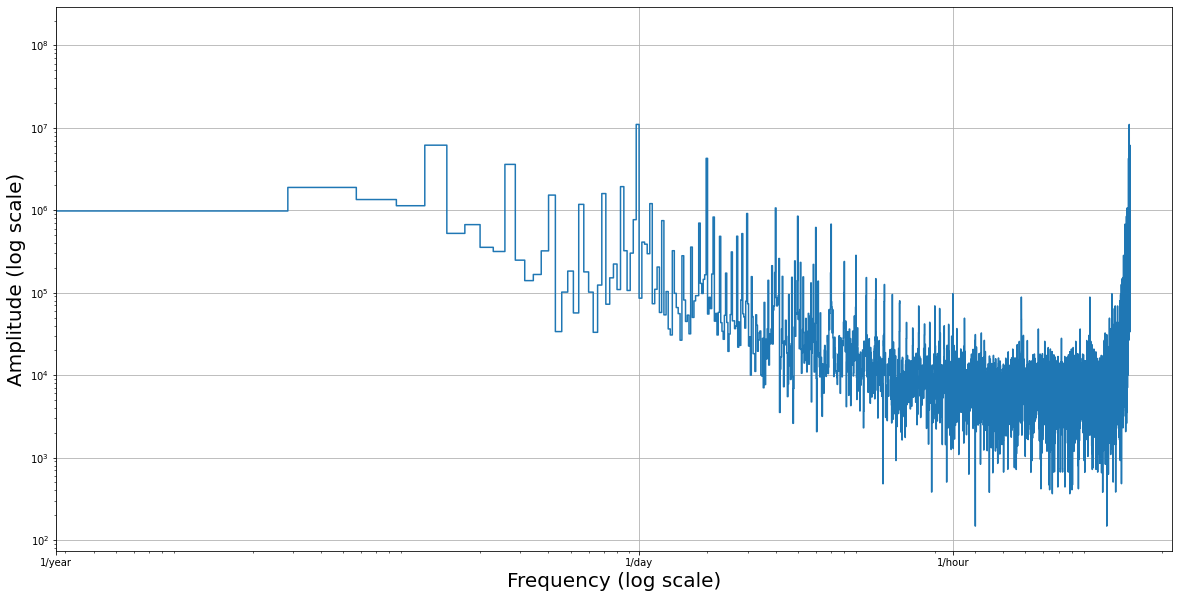

In [105]:
# in an hourly basis

# compute human-readable frequencies
freqs_in_fft = np.arange(0, len(fft_values))
n_samples = len(df['value'])

# map data to a single day
# a day has 24 hours
# each hour has 6 10-minute spans
t_units_per_day = (24 * 6) # number of 10-minute spans in a day

# how many years are being expressed currently in out dataset?
# result should be similar to 34/365.2524 
days_per_dataset = n_samples / (t_units_per_day)

# hoy many frequencies can be allocated in a single year?
freqs_per_day = freqs_in_fft / days_per_dataset

# plot results
fig, ax = plt.subplots(figsize=(20, 10))
ax.step(freqs_per_day, np.abs(fft_values), where='pre')

# format 
ax.set_xscale("log")
ax.set_yscale("log")

# tick labels
plt.xticks([1/365.2524, 1, 24], labels=['1/year', '1/day', '1/hour'])

# labels = [1, 5, 10, 25, 30]
# ax.vlines(labels, *ax.get_ylim(), "g", label=labels, alpha=0.4)

# for label in labels:
#     ax.text(
#         x=label*0.8,
#         y=ax.get_ylim()[1]*0.01,
#         s=f"{int(label):d} days",
#         size=20,
#         rotation=90
#     )

ax.set_xlabel("Frequency (log scale)", size=20)
ax.set_ylabel("Amplitude (log scale)", size=20)

ax.grid()


## two plots in one figure

/home/diego/.pyenv/versions/3.8.0/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


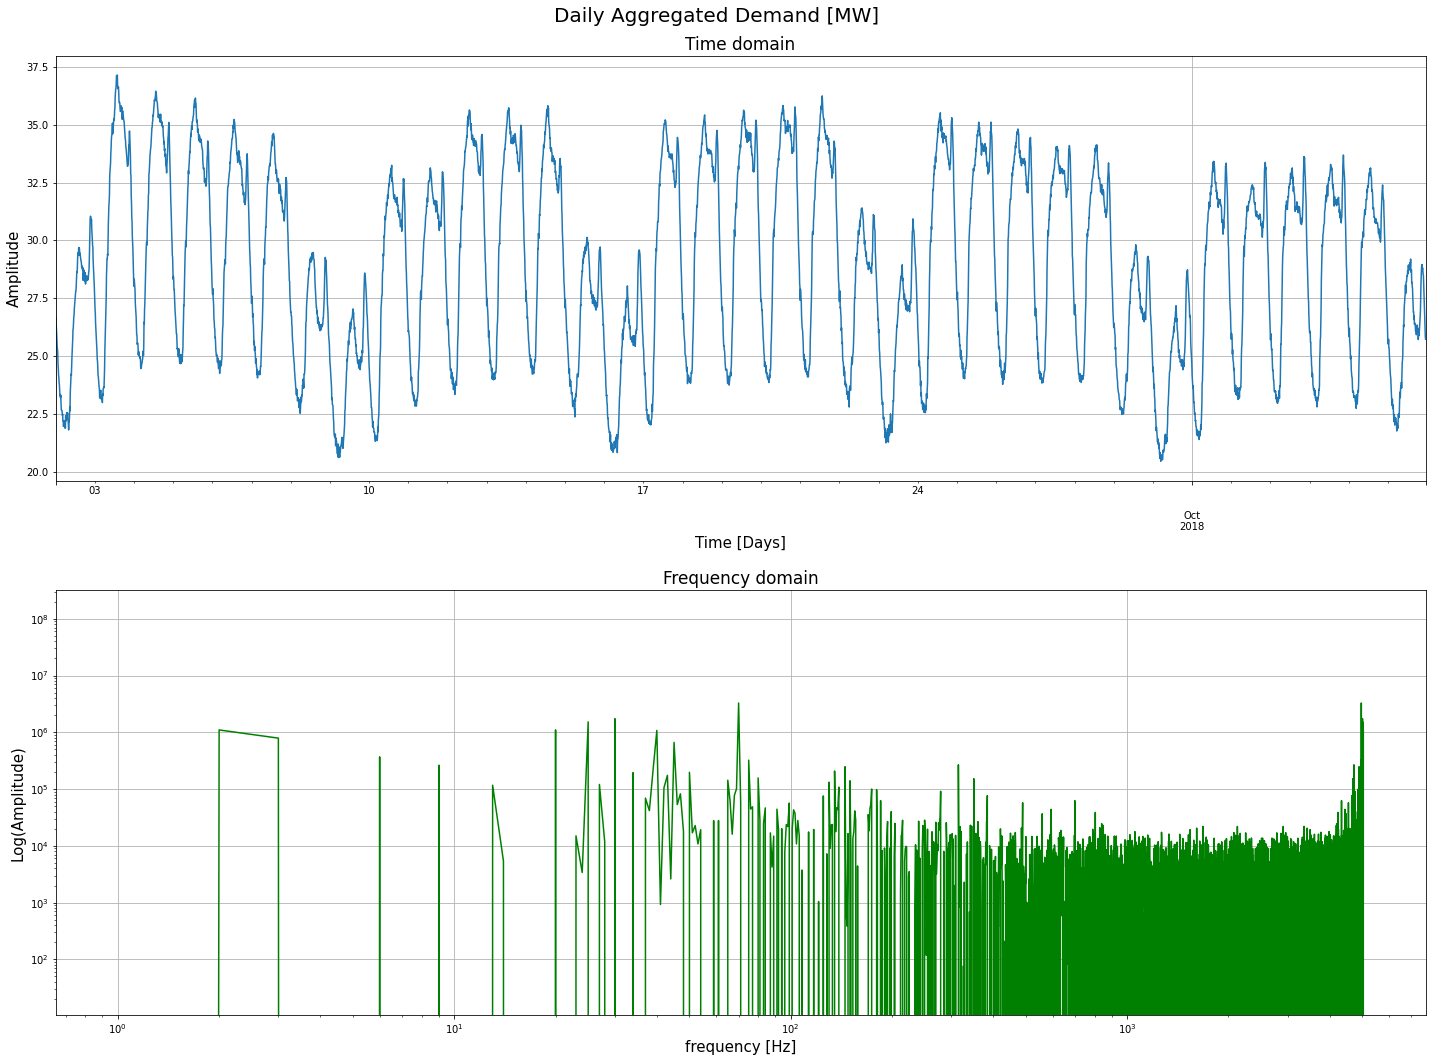

In [220]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# first plot
df["value"].plot(ax=ax1)

# format axis
ax1.set_xlabel("Time [Days]", fontsize=15)
ax1.set_ylabel("Amplitude", fontsize=15)
ax1.set_title("Time domain", fontsize=17)

# format y axis to show MW
# https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
ax1.yaxis.set_major_formatter(lambda x, pos: str(x / 1000.0))
ax1.grid()

# second plot
ax2.plot(fft_values, color="green")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel("frequency [Hz]", fontsize=15)
ax2.set_ylabel("Log(Amplitude)", fontsize=15)
ax2.set_title("Frequency domain", fontsize=17)
ax2.grid()

fig.suptitle("Daily Aggregated Demand [MW]", fontsize=20)
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.935)